# PyRPL Testing log

Source code: 

https://github.com/lneuhaus/pyrpl

2020-03-17 20:52:04 

I will follow the default install instructions:

https://pyrpl.readthedocs.io/en/latest/user_guide/installation/pyrpl_installation.html#installation-from-source

First, I will install the dependencies via conda:

`conda install numpy scipy paramiko pandas nose pip pyqt qtpy pyqtgraph pyyaml`

This went fine.

`pip install pyrpl`

Also fine. Seems to be installed! 

I am currently running 0.99 beta of the RP OS installation on the SD card. According to the PyRPL, it should work with any version of the software, so I'll just leave it as is and see if it works. 

I will now continue with following these instructions:

https://pyrpl.readthedocs.io/en/latest/api.html

2020-03-17 20:57:34

First problem: when I tried to import the library, I got an error about `quamash`. I pip installed it:

`pip install quamash`

The solved the error messages, but I am getting a lot of debugging warnings:

```
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
```

2020-03-17 21:01:22 

Kindof strange: got a popup window asking me to select a filename for a config? Unusual.

Got some error messages:
```
INFO:pyrpl:Please select or create a configuration file in the file selector window!
INFO:pyrpl:All your PyRPL settings will be saved to the config file
    /Users/gsteele/pyrpl_user_dir/config/test.yml
If you would like to restart PyRPL with these settings, type "pyrpl.exe test" in a windows terminal or 
    from pyrpl import Pyrpl
    p = Pyrpl('test')
in a python terminal.
WARNING:pyrpl.redpitaya_client:Socket error during connection attempt 0.
WARNING:pyrpl.redpitaya_client:Socket error during connection attempt 1.
WARNING:pyrpl.redpitaya_client:Socket error during connection attempt 2.
WARNING:pyrpl.redpitaya_client:Socket error during connection attempt 3.
WARNING:pyrpl.redpitaya_client:Socket error during connection attempt 4.
ERROR:pyrpl.redpitaya_client:Error occured in reading attempt 0. Reconnecting at addr 0x40100014 to _reads value 1 by client 1
INFO:pyrpl.redpitaya:Successfully connected to Redpitaya with hostname rp-f06897.local.
```

And then got a GUI window? With an option to select modules? I ended up just closing it.

OK, so the API docs are a bit out of date, they are written for python2.7...(old style print statements).

Also, the API has changed this the API page was written...but this code works:

```
r.scope.voltage_in1
```

Their demo code of a scope acquisition is also out of date...I get some warnings:

```
WARNING:pyrpl.modules:The scope attribute "threshold_chx" is deprecated. Please use "threshold" instead!
WARNING:pyrpl.modules:The scope attribute "hysteresis_chx" is deprecated. Please use "hysteresis" instead!
INFO:pyrpl.modules:Calling setup() for scope.trigger_source ...
WARNING:pyrpl.modules:Trying to load attribute start_phase of module asg1 that are invalid setup_attributes.
```

and then a `TypeError`:

```
Before turning on asg:
Curve ready: False
After turning on asg:
Curve ready: True
Trigger event age [ms]: 30.304184000000003
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
~/anaconda3/envs/myenv/lib/python3.7/site-packages/pyrpl/async_utils.py in result(self)
    132         try: #  concurrent.futures.Future (python 2)
--> 133             return super(PyrplFuture, self).result(timeout=0)
    134         except TypeError: #  asyncio.Future (python 3)

TypeError: result() takes no keyword arguments

During handling of the above exception, another exception occurred:

InvalidStateError                         Traceback (most recent call last)
<ipython-input-22-90941532cfd6> in <module>
     55 # The function curve_async returns a *future* (or promise) of the curve. To
     56 # access the actual curve, use result()
---> 57 ch1, ch2 = res.result()
     58 
     59 # plot the data

~/anaconda3/envs/myenv/lib/python3.7/site-packages/pyrpl/async_utils.py in result(self)
    133             return super(PyrplFuture, self).result(timeout=0)
    134         except TypeError: #  asyncio.Future (python 3)
--> 135             return super(PyrplFuture, self).result()
    136 
    137     def _exit_loop(self, x=None):

InvalidStateError: Result is not set.
```

Hmmm....let's see if I can fix it.

In [5]:
from pyrpl import Pyrpl
from time import sleep
import matplotlib.pyplot as plt

DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty defa

In [6]:
HOSTNAME = "rp-f06897.local"
config_file = "/Users/gsteele/pyrpl_user_dir/config/test.yml"

# Looking at the source, specifing config overrides the stupid GUI startup...
p = Pyrpl(hostname=HOSTNAME,config=config_file)

DEBUG:pyrpl.memory:Loading config file /Users/gsteele/pyrpl_user_dir/config/test.yml
INFO:pyrpl:All your PyRPL settings will be saved to the config file
    /Users/gsteele/pyrpl_user_dir/config/test.yml
If you would like to restart PyRPL with these settings, type "pyrpl.exe test" in a windows terminal or 
    from pyrpl import Pyrpl
    p = Pyrpl('test')
in a python terminal.
ERROR:pyrpl.redpitaya_client:Error occured in reading attempt 0. Reconnecting at addr 0x40100014 to _reads value 1 by client 1
INFO:pyrpl.redpitaya:Successfully connected to Redpitaya with hostname rp-f06897.local.


In [7]:
r = p.rp

In [4]:
for i in range(1000):
    r.scope.voltage_in1

OK, this seems to work!

In [5]:
s = r.scope # shortcut
print("Available decimation factors:", s.decimations)
print("Trigger sources:", s.trigger_sources)
print("Available inputs: ", s.inputs)

Available decimation factors: odict_keys([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536])
Trigger sources: odict_keys(['off', 'immediately', 'ch1_positive_edge', 'ch1_negative_edge', 'ch2_positive_edge', 'ch2_negative_edge', 'ext_positive_edge', 'ext_negative_edge', 'asg0', 'asg1', 'dsp'])
Available inputs:  ['in1', 'in2', 'out1', 'out2', 'iq0', 'iq1', 'iq2', 'iq2_2', 'pid0', 'pid1', 'pid2', 'asg0', 'asg1', 'trig', 'iir', 'off', 'networkanalyzer', 'lockbox.inputs.input_from_output', 'lockbox.outputs.output1', 'lockbox.outputs.output2']


Let's try some of their demo code:

In [22]:
asg = r.asg1
s = r.scope

# turn off asg so the scope has a chance to measure its "off-state" as well
asg.output_direct = "off"

# setup scope
s.input1 = 'asg1'

# pass asg signal through pid0 with a simple integrator - just for fun (detailed explanations for pid will follow)
r.pid0.input = 'asg1'
r.pid0.ival = 0 # reset the integrator to zero
r.pid0.i = 1000 # unity gain frequency of 1000 hz
r.pid0.p = 1.0 # proportional gain of 1.0
r.pid0.inputfilter = [0,0,0,0] # leave input filter disabled for now

# show pid output on channel2
s.input2 = 'pid0'

# trig at zero volt crossing
s.threshold_ch1 = 0

# positive/negative slope is detected by waiting for input to
# sweep through hysteresis around the trigger threshold in
# the right direction
s.hysteresis_ch1 = 0.01

# trigger on the input signal positive slope
s.trigger_source = 'ch1_positive_edge'

# take data symetrically around the trigger event
s.trigger_delay = 0

# set decimation factor to 64 -> full scope trace is 8ns * 2^14 * decimation = 8.3 ms long
s.decimation = 64

# launch a single (asynchronous) curve acquisition, the asynchronous
# acquisition means that the function returns immediately, eventhough the
# data-acquisition is still going on.
res = s.curve_async()

print("Before turning on asg:")
print("Curve ready:", s.curve_ready()) # trigger should still be armed

# turn on asg and leave enough time for the scope to record the data
asg.setup(frequency=1e3, amplitude=0.3, start_phase=90, waveform='halframp', trigger_source='immediately')
sleep(0.010)

# check that the trigger has been disarmed
print("After turning on asg:")
print("Curve ready:", s.curve_ready())
print("Trigger event age [ms]:",8e-9*((
s.current_timestamp&0xFFFFFFFFFFFFFFFF) - s.trigger_timestamp)*1000)

# The function curve_async returns a *future* (or promise) of the curve. To
# access the actual curve, use result()
ch1, ch2 = res.result()

# plot the data
%matplotlib inline
plt.plot(s.times*1e3, ch1, s.times*1e3, ch2)
plt.xlabel("Time [ms]")
plt.ylabel("Voltage")

INFO:pyrpl.modules:Calling setup() for scope.trigger_source ...


Before turning on asg:
Curve ready: False
After turning on asg:
Curve ready: True
Trigger event age [ms]: 30.304184000000003


InvalidStateError: Result is not set.

OK. Not so good. I will try a simpler example to see if I can just run a single manual trigger on the scope and pull the trace.

In [31]:
print(s.input1_options)

['in1', 'in2', 'out1', 'out2', 'iq0', 'iq1', 'iq2', 'iq2_2', 'pid0', 'pid1', 'pid2', 'asg0', 'asg1', 'trig', 'iir', 'off', 'networkanalyzer', 'lockbox.inputs.input_from_output', 'lockbox.outputs.output1', 'lockbox.outputs.output2']


In [94]:
s.decimation_options

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536]

In [98]:
s.input1 = 'in1'
s.input2 = 'in2'
s.decimation = 1024
s.average = False
s.average = True
s.trigger_source = 'immediately'
s._start_acquisition()
sleep(s.duration)
c1,c2 = s._get_curve()

In [99]:
t = s.times

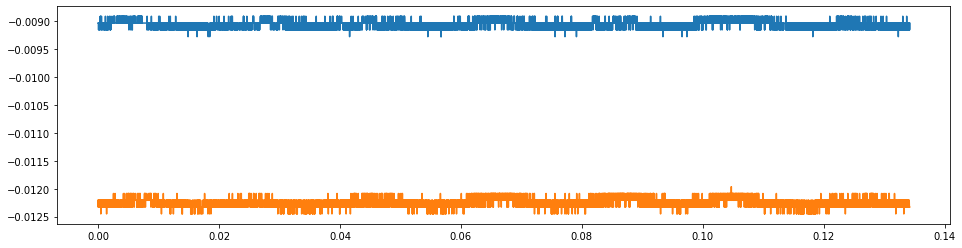

In [100]:
plt.subplots(figsize=(16,4))
plt.plot(t,c1)
plt.plot(t,c2)

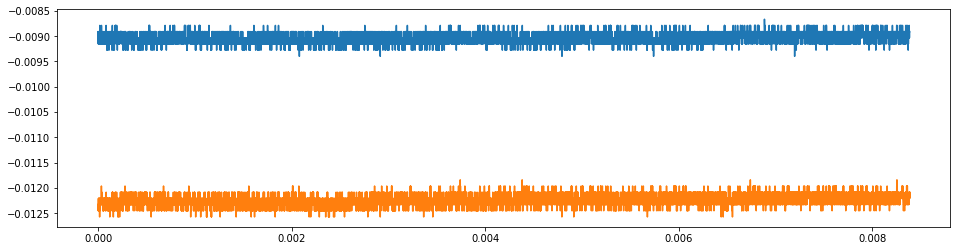

In [88]:
plt.subplots(figsize=(16,4))
plt.plot(t,c1)
plt.plot(t,c2)

In [85]:
s.duration

0.008388608

# Upshot: the compact final code

In [105]:
from pyrpl import Pyrpl
from time import sleep
import matplotlib.pyplot as plt

r = p.rp
s = r.scope

In [158]:
def get_traces(avg=True):
    s.input1 = 'in1'
    s.input2 = 'in2'
    s.decimation = 1024
    s.average = avg
    s.trigger_source = 'immediately'
    s._start_acquisition()
    sleep(s.duration)
    c1,c2 = s._get_curve()
    t = s.times
    return t, c1, c2

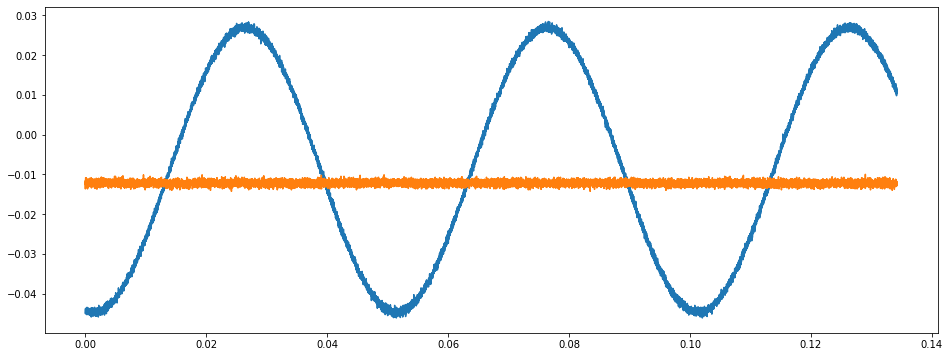

In [163]:
t, c1, c2 = get_traces(0)
plt.subplots(figsize=(16,6))
plt.plot(t,c1)
plt.plot(t,c2)

Final question: has it handled the HV jumpers correctly? Try using the signal generators:

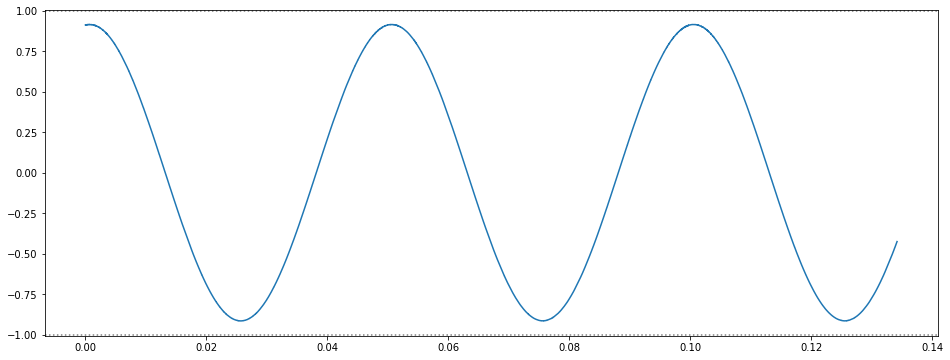

In [181]:
asg = r.asg0
asg.output_direct = 'out1'
a = 1
asg.setup(waveform='sin', frequency=20, amplitude=a*1.1, offset=0, trigger_source='immediately')
t, c1, _ = get_traces()
plt.subplots(figsize=(16,6))
plt.plot(t,c1)
plt.axhline(a, ls=':', c='grey')
plt.axhline(-a, ls=':', c='grey')


Notes:

* There is no option in the driver to account for using the HV jumpers
* There seems to be an offset and scaling issue? Either in digitizer or in generator? I will have to benchmark this at work with the scope I think.

Maybe I will try turning the jumpers to LV mode and double check.

OK, with jumpers in LV setting, the "1.0" amplitude square wave swings from -0.91 to 0.91. Not much offset, but also not 1.0 V. 

## More testing

In [16]:
from pyrpl import Pyrpl
from time import sleep
import matplotlib.pyplot as plt
import numpy as np

In [19]:
HOSTNAME = "rp-f06897.local"
#config_file = "/Users/gsteele/pyrpl_user_dir/config/test.yml"

#HOSTNAME = "192.168.2.2"

# Looking at the source, specifing config overrides the stupid GUI startup...
#
# OK, gui=False will ask inline for a config file location instead of making a pop-up
# But still it opens the stupid gui window! Annoying.

p = Pyrpl(hostname=HOSTNAME, config='test',gui=False)

r = p.rp
s = r.scope

# OK, I think I figured it out. I want to create ONLY a RedPitaya object!


#from pyrpl import RedPitaya
#r = RedPitaya(hostname=HOSTNAME)

#s = r.scope
# Ha that was it! Thank god!!!

INFO:pyrpl:All your PyRPL settings will be saved to the config file
    /Users/gsteele/pyrpl_user_dir/config/test.yml
If you would like to restart PyRPL with these settings, type "pyrpl.exe test" in a windows terminal or 
    from pyrpl import Pyrpl
    p = Pyrpl('test')
in a python terminal.
INFO:pyrpl.redpitaya:Successfully connected to Redpitaya with hostname 192.168.2.2.


In [20]:
asg = r.asg0
asg.output_direct = 'out1'
a = 1
asg.setup(waveform='sin', frequency=20, amplitude=a*1.1, offset=0, trigger_source='immediately')

In [21]:
def get_traces(avg=True):
    s.input1 = 'in1'
    s.input2 = 'in2'
    s.decimation = 1024
    s.average = avg
    s.trigger_source = 'immediately'
    s._start_acquisition()
    sleep(s.duration)
    c1,c2 = s._get_curve()
    t = s.times
    return t, c1, c2

In [28]:
asg = r.asg0
asg.output_direct = 'out1'
a = 0.5
asg.setup(waveform='sin', frequency=20, amplitude=a, offset=0, trigger_source='immediately')

Peak to peak:  0.9146728515625
Average:  -0.022669509053230286


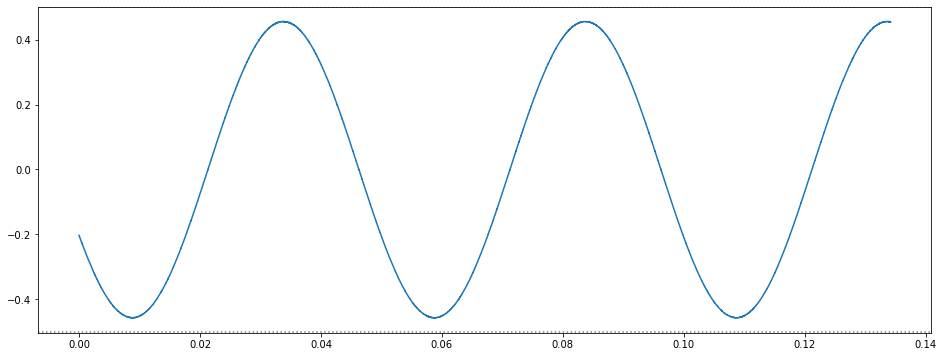

In [29]:
t, c1, _ = get_traces()
plt.subplots(figsize=(16,6))
plt.plot(t,c1)
plt.axhline(a, ls=':', c='grey')
plt.axhline(-a, ls=':', c='grey')
print("Peak to peak: ", (np.max(c1)-np.min(c1)))
print("Average: ", np.average(c1))

Strange, now the offset and gain problems seem to be solved? 

OK, after closing my laptop, the connection reset.  Now when I run the acquisition with a 1 V amplitude, I get a peak to peak of:

```
Peak to peak:  0.9140625
```

Let's try starting the oscilloscope software of the RP, closing it, and then  doing the same acquisition agian.

OK, now I'm getting a different PTP reading:


```
Peak to peak:  0.983154296875
```

Now, let's try reloading the RP object and re-running the code: 

```
Peak to peak:  0.9150390625
```

OK, weird. Now open and close scope application via the RP web interface, and repeat:

```
Peak to peak:  0.9832763671875
```

And now also I'm getting sometimes some weird jumps in the trace. I 

Let's try power cycling the RP and then rerunning the code above. OK, this does not work, I've lost the connection and need to re-establish it by re-initialising the object above.  

Now my peak-to-peak values are back to the low values again: 

```
Peak to peak:  0.9149169921875
```

but also the strange trigger jumps are now gone in the trace. 


Let's try a live update:

In [45]:
import IPython
import ipywidgets as widgets
ipython = IPython.get_ipython()


from bokeh.plotting import figure, show
from bokeh.io import output_notebook, push_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Toggle, Range1d
output_notebook()

Loading BokehJS ...

In [67]:
source = ColumnDataSource()
p = figure(plot_height=300, plot_width=900,toolbar_location=None)
p.line('x', 'y', source=source)
stop_button = widgets.ToggleButton(description='Stop')

def update_display():
    t,c1,_ = get_traces()
    source.data = dict(x=t,y=c1)   

update_display()
target = show(p, notebook_handle=True)
display(stop_button)

while True:
    ipython.kernel.do_one_iteration()
    if stop_button.value:
        break
    update_display()
    push_notebook(handle=target)
    

ToggleButton(value=False, description='Stop')